In [1]:
import pandas as pd
import numpy as np 

In [2]:
#reading the dataset
df = pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
df.shape

(200, 4)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


- we see there are non-null values

In [5]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
#visualise the dataset 
#we need to import some more libraries for linear regression 
import matplotlib.pyplot as plt
import seaborn as sns

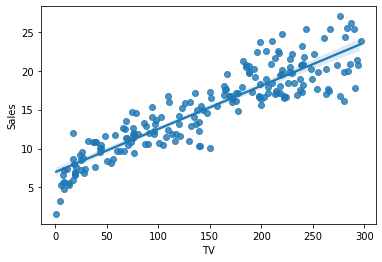

In [7]:
#plotting reg plot, stands for regression 
sns.regplot(x='TV' , y='Sales', data=df)

We can see a linear relationship between TV and Sales. 

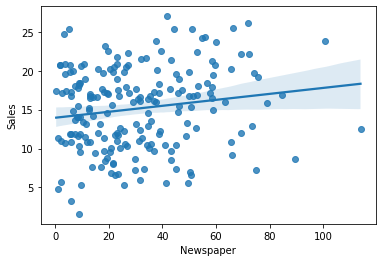

In [8]:
sns.regplot(x='Newspaper' , y='Sales', data=df)

we see its not much of a linear plot

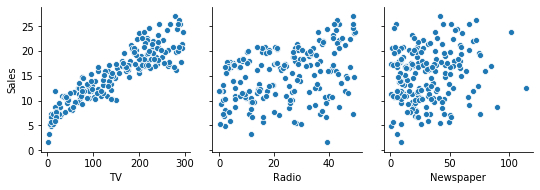

In [9]:
sns.pairplot(data=df, x_vars=['TV','Radio','Newspaper'], y_vars=['Sales'])

In [10]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


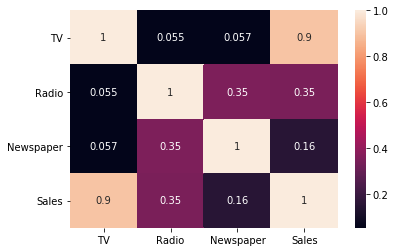

In [11]:
sns.heatmap(df.corr(),annot=True)

In [12]:
#Building a linear regression model 
#importing the ML libraries

import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split

In [13]:
X= df['TV']
y= df['Sales']

In [14]:
#train-test split 
X_train , X_test, y_train, y_test = train_test_split(X, y , train_size = 0.70, random_state= 100)

In [15]:
X_train

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
       ...  
87     110.7
103    187.9
67     139.3
24      62.3
8        8.6
Name: TV, Length: 140, dtype: float64

In [16]:
y_train

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
       ... 
87     16.0
103    19.7
67     13.4
24      9.7
8       4.8
Name: Sales, Length: 140, dtype: float64

In [17]:
#training a model
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm) #minimisg the sum of squared errors
lr_model=lr.fit()

In [18]:
X_train_sm =sm.add_constant(X_train)
X_train_sm.head()

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


In [19]:
#fitting the model
lr = sm.OLS(y_train ,X_train_sm)
lr_model = lr.fit()


In [20]:
#lookig for the parameters of the model
lr_model.params

const    6.948683
TV       0.054546
dtype: float64

In [25]:
# Sales = 6.94 +0.054.TV
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Tue, 31 Aug 2021   Prob (F-statistic):           1.52e-52
Time:                        15:56:48   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
y_train_pred = lr_model.predict(X_train_sm)

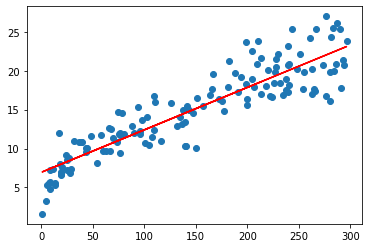

In [29]:
#plotting to evluate the model 

plt.scatter(X_train, y_train)
plt.plot(X_train , y_train_pred, 'r')
plt.show()

### Residual analysis 

In [31]:
res = y_train - y_train_pred
res

74    -1.588747
3      1.287635
185    4.469437
26     0.256729
90    -0.274178
         ...   
87     3.013102
103    2.502170
67    -1.146907
24    -0.646884
8     -2.617777
Length: 140, dtype: float64

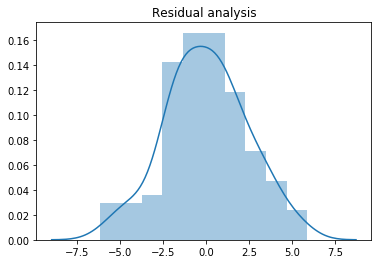

In [37]:
plt.figure()
sns.distplot(res)
plt.title("Residual analysis")
plt.show()

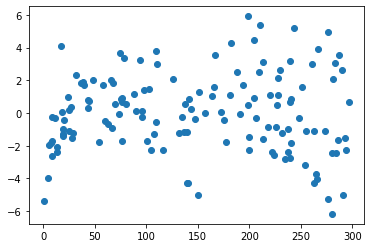

In [38]:
plt.scatter(X_train, res)

### prediction and evaluation on the test set 

In [41]:
#addding a const intercept to test 
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,TV
126,1.0,7.8
104,1.0,238.2
99,1.0,135.2
92,1.0,217.7
111,1.0,241.7


In [43]:
#pred on test 
y_test_pred = lr_model.predict(X_test_sm)

In [39]:
#evaluate the model, r-squared on the test 
#r-squared 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score

In [46]:
r2 = r2_score(y_true = y_test, y_pred= y_test_pred)
r2

0.7921031601245658

In [47]:
#r2 on train 
r2_score (y_true = y_train, y_pred = y_train_pred)

0.8157933136480389

In [48]:
#mean_squared_error
mean_squared_error(y_true = y_train, y_pred = y_train_pred)


5.752400386486836

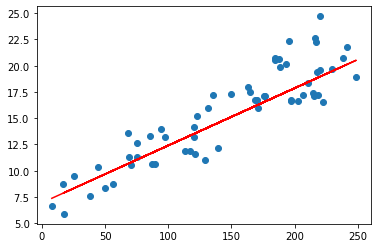

In [50]:
#visualising the test set
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

## using sklearn

In [51]:
#train-test split 
X_train , X_test, y_train, y_test = train_test_split(X, y , train_size = 0.70, random_state= 100)

In [52]:
#steps in sklearn model building
from sklearn.linear_model import LinearRegression

In [65]:
#creating an object
lm = LinearRegression()

In [66]:
#reshaping X_train to (n,1)
X_train_lm = X_train.values.reshape(-1,1)
X_test_lm = X_test.values.reshape(-1,1)

In [67]:
#fit the model
lm.fit (X_train_lm, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [68]:
help(lm)

Help on LinearRegression in module sklearn.linear_model._base object:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, optional, default True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  normalize : bool, optional, default False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |      sub

In [69]:
print(lm.coef_)
print(lm.intercept_)

[0.05454575]
6.948683200001357


In [71]:
#make predictions 
y_train_pred = lm.predict(X_train_lm)
y_test_pred = lm.predict(X_test_lm)

In [72]:
print(r2_score (y_true = y_train, y_pred = y_train_pred))
print(r2_score (y_true = y_test, y_pred = y_test_pred))


0.8157933136480389
0.7921031601245662
